In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io.arff import loadarff
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
# import selectKBest
from sklearn.feature_selection import SelectKBest

FEATURE_AMOUNT = [5, 10, 40, 100, 250, 700]
SEED = 1

#### Loading data

In [22]:
df = loadarff('data/pd_speech.arff')
df = pd.DataFrame(df[0])
df['class'] = df['class'].str.decode('utf-8')

The first step should be splitting the dataset into stratified training and testing sets (70-30 split) with a fixed seed (`random_state=1`).

In [23]:
train, test = train_test_split(
  df,
  test_size=0.3,
  random_state=SEED,
  stratify=df['class']
)
X = train.drop('class', axis=1)
y = train['class']

Afterward, we should try to check the discriminative power of each feature considering the `mutual_info_classif` criterion.
If we can only use a subset of features, we should select the most discriminative ones, (i.e, if we can use 5 features, we should select the 5 most discriminative ones, and so on).

In [24]:
mimportance = mutual_info_classif(X, y, random_state=SEED)
SORTED_FEATURES = np.argsort(mimportance)[::-1]

Now, time to finally assess (in a single plot) both the training and testing accuracies of a decision tree with no depth limits (and remaining default behavior) for a varying number of selected features.

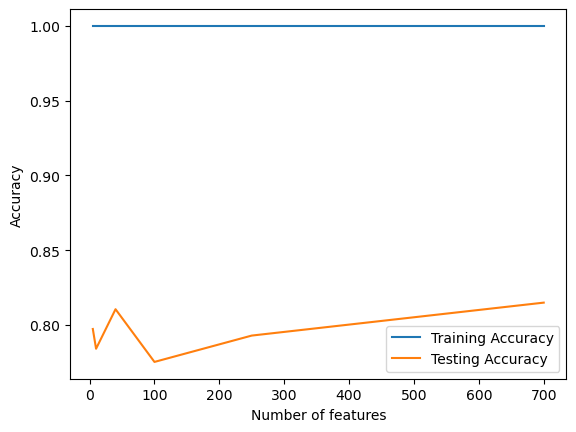

In [25]:
def train_and_test(X_train, X_test, y_train, y_test):
    clf = DecisionTreeClassifier(random_state=SEED)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    return accuracy_score(y_test, y_pred)

train_accuracies = []
test_accuracies = []

for n in FEATURE_AMOUNT:
    chosen_features = X.columns[SORTED_FEATURES[:n]]
    X_train = train[chosen_features]
    X_test = test[chosen_features]
    train_accuracies.append(train_and_test(X_train, X_train, y, y))
    test_accuracies.append(train_and_test(X_train, X_test, y, test['class']))

plt.plot(FEATURE_AMOUNT, train_accuracies, label='Training Accuracy')
plt.plot(FEATURE_AMOUNT, test_accuracies, label='Testing Accuracy')
plt.xlabel('Number of features')
plt.ylabel('Accuracy')
plt.legend()
plt.show()